<a href="https://colab.research.google.com/github/JhonnyLimachi/IA_en_Salud/blob/main/4_Regresi%C3%B3n_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Regresión lineal

El análisis de regresión estudia la relación entre una variable dependiente y una o más variables independientes. Esta relación se representa mediante un modelo matemático. Cuando sólo hay una variable independiente que establece una relación lineal con la variable dependiente, este modelo se denomina regresión lineal simple. Cuando hay varias variables independientes, tenemos un modelo de regresión lineal múltiple.


Si alguna vez has vendido algo, sabes lo difícil que es fijar un buen precio de venta. A menudo fijamos un precio demasiado bajo (y vendemos en el acto) y otras veces fijamos un precio tan alto que no interesa a nadie. Si hablamos de inmuebles, hay varios factores que complican la situación.

<p align="center">
<img src="https://data-science-blog.com/wp-content/uploads/2022/05/linear-regression-error-term.png" width="50%"></p>

En la figura anterior, tenemos el *scatter plot* entre la superficie de la propiedad y el precio de venta para la ciudad de Ames, situada en el estado estadounidense de Iowa. Supongamos que tienes una casa con una superficie de 1339 $m^2$ y quieres ponerla a la venta. ¿Qué precio le pondría?

Puesto que tenemos datos de miles de otras casas y parece que estos datos tienen una relación lineal, ¿por qué no intentar trazar una línea para deducir el precio de nuestra propia casa?

<p align="center">
<img src="https://miro.medium.com/v2/resize:fit:1400/1*Cw5ZSYDkIFpmhBwr-hN84A.png" width="50%"></p>

Uma reta por ser representada por uma equação do tipo $\hat{y} = \theta_0 + \theta_1 x_1$, onde $\hat{y}$ é o valor que estamos querendo prever.

Para saber "cómo de buena" es una recta, es decir, si es ideal para representar nuestros puntos, podemos calcular el error cuadrático medio (*Mean Squared Error* - MSE) de todos los puntos.

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Básicamente, esta ecuación calcula la distancia de cada punto a la recta. Cuanto menor sea este valor, mejor será nuestra solución. El algoritmo `scikit-learn` hace todos los cálculos para minimizar este valor tanto como sea posible para nosotros. Cuando encuentra este valor *óptimo*, almacena los valores de los coeficientes y el intercepto como un atributo de la variable.

<p align="center">
<img src="https://vitalflux.com/wp-content/uploads/2022/02/linear-regression-f-statistics-definition.jpg" width="80%"></p>

## Regressão Linear Simples

Para demonstrar como implementar uma Regressão Linear Simples, nós iremos usar o *dataset* [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) juntamente com a biblioteca `scikit-learn`.


El [dataset original](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) que estoy utilizando en este *notebook* contiene 79 variables relacionadas con el sector inmobiliario de Ames, una ciudad situada en el estado norteamericano de Iowa, y está disponible para su descarga en Kaggle. Sin embargo, para facilitar la comprensión de los conceptos básicos, he preparado una versión simplificada de este *dataset*, en la que sólo hay una variable. El archivo `csv` está disponible [en este enlace](http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0).


Empezaré importando el fichero en un *DataFrame* y analizándolo muy rápidamente. Recuerda que el objetivo de este módulo no es realizar un análisis exploratorio exhaustivo, sino centrarnos en la fase de implementación de modelos de *Machine Learning*.


In [1]:
# importar los paquetes necesários
import pandas as pd
import matplotlib.pyplot as plt

# importar el archivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0")

# ver las primeiras entradas
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


El *dataset* importado contiene la variable `GrLivArea` con el tamaño de la propiedad ($m^2$) y la variable objetivo `SalePrice` con su precio de venta. Voy a trazar un gráfico de dispersión para que te hagas una idea de cómo están relacionados los puntos.

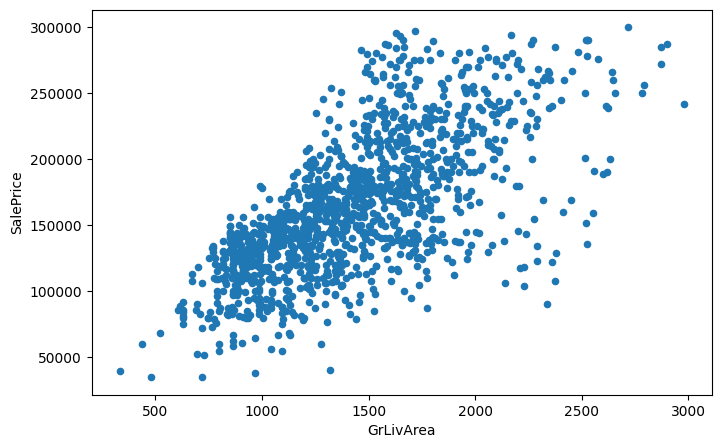

In [2]:
# plotar gráfico de dispersión.
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)
plt.show()

### Simple Linear Regression with `scikit-learn`

Una vez que hayas hecho todo el análisis exploratorio, definido las variables y preparado los datos adecuadamente, es hora de construir la Regresión Lineal Simple.

En las competiciones de Kaggle, se suelen proporcionar datos de entrenamiento y de prueba. En el mundo real, tienes que dividir tu conjunto entre *entrenamiento* y *prueba* para que se excluyan mutuamente.

Este paso es extremadamente importante, ya que hará que el modelo sea más genérico y más preciso en relación con los nuevos datos que puedan introducirse en él. En este *dataset*, voy a separar el 20% de los datos para la prueba al final.


In [3]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Voy a separar la variable dependiente (`SalePrice`) de nuestra *característica*, y utilizar la función `train_test_split` para dividir los datos de entrenamiento y de prueba.

In [4]:
# 0. Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Cargar los datos (suponiendo que 'df' ya está definido)
# Ejemplo ficticio para demostración
data = {
    'GrLivArea': [1500, 1800, 1200, 2000, 1400],
    'SalePrice': [300000, 350000, 250000, 400000, 280000]
}
df = pd.DataFrame(data)

# 2. Escoger e importar un modelo
model = LinearRegression()

# 3. Separar los datos entre feature matrix (X) y target vector (y)
X = df[['GrLivArea']]  # Usando dobles corchetes para mantener X como DataFrame
y = df['SalePrice']

# 3.1 Dividir el dataset entre conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Fit del modelo (entrenamiento)
model.fit(X_train, y_train)

# 5. Hacer predicciones sobre nuevos datos (X_test)
y_pred = model.predict(X_test)

# Opcional: Evaluar el rendimiento del modelo (ejemplo de métrica)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Opcional: Mostrar coeficientes del modelo
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 98566326.79468001
Coefficients: [190.64748201]
Intercept: 16762.589928057627


Es más importante que desesperarse para entender lo que ha sucedido. El mensaje de error anterior se debe a `sklearn.pipeline` en el paquete. Ocurre porque pasamos sólo una variable (*feature*) en la variable `X`. Vea esta parte del mensaje de error:


> *...si tus datos tienen una sola característica o array.reshape(1, -1)*

Una cosa que debes recordar es que `scikit-learn` espera dos cosas en esta etapa:

* Que la variable `X` sea siempre un `np.array` con **dos dimensiones**.
* Que la variable `y` sea siempre un `np.array` con **una dimensión**.

Mira los `prints` de abajo para ver las dimensiones de cada una de nuestras variables y verás que no se ajustan a lo que espera el paquete.

In [5]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("X (reshape):\t",X.values.reshape(-1,1).shape)

print("y:\t\t", y.shape)

df:		 (5, 2)
X:		 (5, 1)
X (reshape):	 (5, 1)
y:		 (5,)


Esto es fácil de resolver. Cuando necesite cambiar la dimensión de una *matriz* para cumplir la condición anterior, utilice `.reshape(-1,1)`.

In [6]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df['GrLivArea'].values.reshape(-1,1)
y = df['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

LinearRegression()

Si hablamos de Regresión Lineal, estamos hablando de construir una línea recta. Esta línea tiene coeficientes asociados a los ángulos de inclinación y de intercepción. En este caso concreto de Regresión Lineal Simple, sólo tenemos un coeficiente de regresión.

Para obtener el **coeficiente de regresión** y el **intercepto**, basta con acceder a los atributos del modelo directamente desde la variable `ml_model`.



In [7]:
# imprimir los coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [166.66666667]
Intercepto:	 50000.00000000009


Como estamos trabajando con un problema de baja dimensión, es posible trazar nuestra línea recta, obtenida por el modelo *Machine Learning*, sobre los datos de nuestro *dataset*. Observa lo bien que representa nuestro conjunto de puntos.

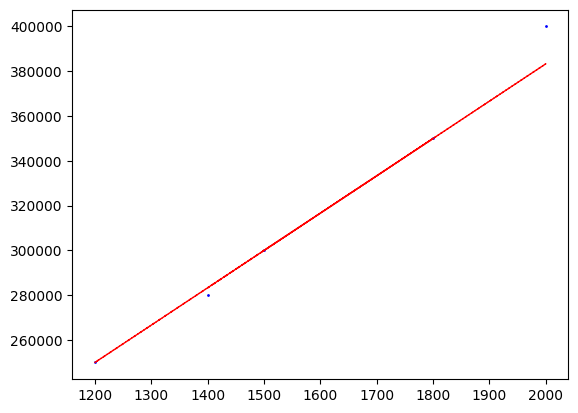

In [8]:
# plotar recta y datos
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=1)

Con el modelo entrenado, está listo para hacer predicciones sobre nuevos datos. Como antes separamos los datos de prueba en la variable `y_test`, haremos las predicciones utilizando el método `predict()` y las almacenaremos en la variable `y_pred`.

In [10]:
# 5. Hacer predicciones basadas en nuevos datos
y_pred = model.predict(X_test)

Hay una frase muy conocida en el campo del Mando y Control (C2) que dice que "no se puede controlar lo que no se puede medir".

Un modelo de *Machine Learning* debe ser cuantificable, ya sea en términos de rendimiento o de precisión. En el caso de los modelos de Regresión,
Comprobemos el rendimiento del modelo en nuestro conjunto de pruebas utilizando las métricas siguientes:

***R-Cuadrado -*** una métrica popular utilizada para calcular la precisión de su modelo. Básicamente, calcula lo bien que su modelo se ajusta a los datos, cuantificando la calidad entre 0 y 1. En este caso, la mejor puntuación que puede alcanzar su modelo es 1.

***Error Medio Absoluto (MAE) -*** es la media absoluta del error, representada por la media de las sumas de los errores individuales (distancias entre puntos y líneas).

***Error cuadrático medio (MSE) -*** es la media de los cuadrados de los errores y probablemente la métrica más conocida. Tiende a penalizar los errores de forma exponencial, tratando de forma diferente los errores pequeños y los grandes.

Traducción realizada con la versión gratuita del traductor DeepL.com

In [11]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.9598765432098763
MAE:		 10000.00000000003
MSE:		 144444444.44444567


## Regresión lineal múltiple

El razonamiento utilizado en la Regresión Lineal Múltiple es exactamente el mismo que vimos en la anterior. La diferencia es que tenemos más variables independientes a considerar en nuestro modelo.

Para demostrar cómo implementarlo, voy a utilizar un *dataset* más completo que el anterior, disponible para descargar [en este enlace](http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=0).

Hemos mantenido las 1.460 entradas, pero ahora tenemos 34 *características*. Importemos el archivo y echemos un vistazo a las primeras entradas.

In [12]:
# importar los paquetes necesários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.drop('Id', axis=1, inplace=True)
df.head()

Tamanho de df: (1460, 35)



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


Exactamente igual, voy a dividir los datos entre prueba-entrenamiento, construir el modelo y ejecutar el método `fit(X_entrenamiento, y_entrenamiento)`.

In [13]:
# 1.elegir e importar un modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Haz una pausa y compáralo con el ejemplo de regresión lineal simple. ¿Cuál es la diferencia?

Cuando intentamos pasar una única *característica*, se pasó una estructura de una sola dimensión, lo que provocó que `scikit-learn` diera un error. Sin embargo, cuando usamos más de una *característica*, ya tenemos objetos bidimensionales sin necesidad de redimensionarlos. Echa un vistazo a los `prints` de abajo para ver las dimensiones de cada una de nuestras variables y compararlas con el ejemplo anterior.

In [14]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("y:\t\t", y.shape)

df:		 (1460, 34)
X:		 (1460, 33)
y:		 (1460,)
